In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [34]:
def load_data(name, paths):
    data = [np.load(p) for p in paths]
    train = np.array([d['train'] for d in data])
    val = np.array([d['val'] for d in data])
    test = np.array([d['test'] for d in data])
    return {
        'name': name,
        'train_mean': train.mean(axis=0),
        'train_std': train.std(axis=0),
        'val_mean': val.mean(axis=0),
        'val_std': val.std(axis=0),
        'test_mean': test.mean(),
        'test_std': test.std(),
      }

def print_stats(d):
    print(f"Loss for {d['name']} is {d['test_mean']:.4f}+-{d['test_std']:.4f}")

In [35]:
x = np.arange(0, 200)

In [36]:
feat = load_data('Features & Spectral', ['runs/feat_rotations_2d_eigens_42.npz',
                                         'runs/feat_rotations_2d_eigens_43.npz',
                                         'runs/feat_rotations_2d_eigens_44.npz',
                                         ])
print_stats(feat)

Loss for Features & Spectral is 0.2970+-0.0098


In [37]:
rot = load_data('Spectral', ['runs/rotations_2d_eigens_42.npz',
                             'runs/rotations_2d_eigens_43.npz',
                             'runs/rotations_2d_eigens_44.npz',
                             ])
print_stats(rot)

Loss for Spectral is 0.3910+-0.0059


In [38]:
eig = load_data('EigenGAT', ['runs/eigen_gat_2d_eigens_42.npz',
                             'runs/eigen_gat_2d_eigens_43.npz',
                             ])
print_stats(eig)

Loss for EigenGAT is 0.4919+-0.0044


In [43]:
gat = load_data('GAT', ['runs/gat_2d_eigens_42.npz',
                        'runs/gat_2d_eigens_43.npz',
                        'runs/gat_2d_eigens_44.npz',
                        ])
print_stats(gat)

Loss for GAT is 0.4831+-0.0008


In [47]:
mpnn = load_data('MPNN', ['runs/mpnn_2d_eigens_42.npz',
                          'runs/mpnn_2d_eigens_44.npz',
                          ])
print_stats(mpnn)

Loss for MPNN is 0.2959+-0.0053


In [48]:
def add_to_plot(ax, d, split):
    NUM_STD_DEV=2
    ax.plot(x, d[f'{split}_mean'], label=d['name'])
    ax.fill_between(x, d[f'{split}_mean']-NUM_STD_DEV*d[f'{split}_std'] ,
                    d[f'{split}_mean']+NUM_STD_DEV*d[f'{split}_std'], alpha=0.2)

def add_to_plot_multi(axs, d, splits):
    for ax, split in zip(axs, splits):
        add_to_plot(ax, d, split)

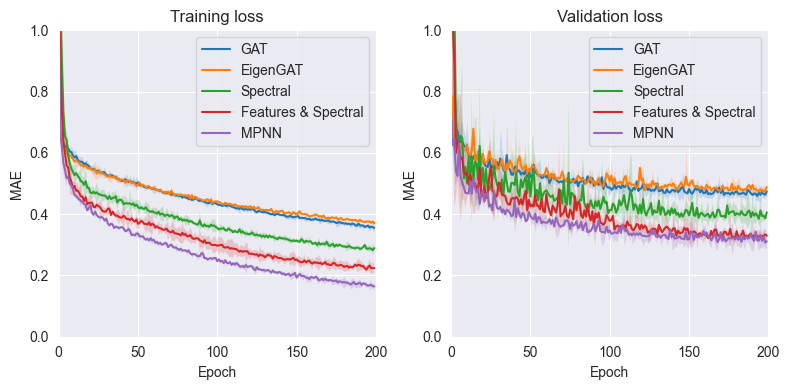

In [49]:
fig, (ax_train, ax_val) = plt.subplots(1,2, figsize=(8,4))

add_to_plot_multi([ax_train, ax_val], gat, ['train', 'val'])
add_to_plot_multi([ax_train, ax_val], eig, ['train', 'val'])
add_to_plot_multi([ax_train, ax_val], rot, ['train', 'val'])
add_to_plot_multi([ax_train, ax_val], feat, ['train', 'val'])
add_to_plot_multi([ax_train, ax_val], mpnn, ['train', 'val'])


ax_train.set_ylim(0, 1)
ax_train.set_xlim(0, 200)
ax_train.set_title('Training loss')
ax_train.legend(loc='best')
ax_train.set_xlabel('Epoch')
ax_train.set_ylabel('MAE')

ax_val.set_ylim(0, 1)
ax_val.set_xlim(0, 200)
ax_val.set_title('Validation loss')
ax_val.legend(loc='best')
ax_val.set_xlabel('Epoch')
ax_val.set_ylabel('MAE')

fig.tight_layout()
fig.savefig('graphics/loss.png', dpi=400)
pass